# Import Libraries

In [ ]:
import sys
print(sys.executable)
print(sys.version)


c:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe
3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


In [ ]:
import sklearn
print(sklearn.__version__)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'sklearn'

# Load Data

In [71]:
df = pd.read_csv(r"D:\MY PROJECTS\PANDAS_1\IDEALIZE\Dataset\train.csv")

# LETS START PREPROCESSING DATA!

## calculating missing 

In [72]:
total = len(df)

percent_missing = (df.isnull().sum() / total) * 100

missing_stats = pd.DataFrame({
    'Column Name': df.columns,
    'missing_percentage': percent_missing.round(2)
})

# Sort by missing_percentage in descending order
missing_stats = missing_stats.sort_values(by='missing_percentage', ascending=False)

# Add % sign for display
missing_stats['missing_percentage'] = missing_stats['missing_percentage'].astype(str) + '%'

missing_stats

,Column Name,missing_percentage
Sunshine,Sunshine,47.77%
Evaporation,Evaporation,42.81%
Cloud3pm,Cloud3pm,40.15%
Cloud9am,Cloud9am,37.69%
Pressure9am,Pressure9am,9.92%
Pressure3pm,Pressure3pm,9.9%
WindDir9am,WindDir9am,7.08%
WindGustDir,WindGustDir,6.58%
WindGustSpeed,WindGustSpeed,6.54%
WindDir3pm,WindDir3pm,2.7%


## visually representing Missing values

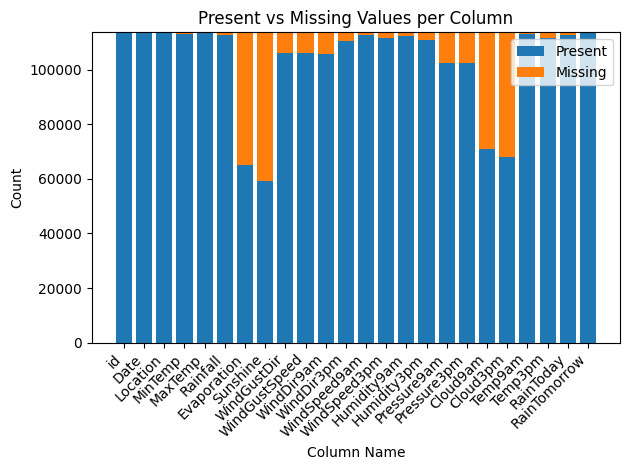

In [73]:
import matplotlib.pyplot as plt

present = df.notnull().sum()
missing = df.isnull().sum()

plt.bar(df.columns, present, label='Present')
plt.bar(df.columns, missing, bottom=present, label='Missing')
plt.xlabel('Column Name')
plt.ylabel('Count')
plt.title('Present vs Missing Values per Column')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## drop colomns

In [74]:
preprocessed_df = df.copy()

In [75]:
cols_to_drop = ['id']
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count / len(df) > 0.35:
        cols_to_drop.append(col)

preprocessed_df.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped columns: {cols_to_drop}")

        

Dropped columns: ['id', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']


## thinking what to do with other missing values

In [76]:
total = len(preprocessed_df)

percent_missing = (preprocessed_df.isnull().sum() / total) * 100

missing_stats = pd.DataFrame({
    'Column Name': preprocessed_df.columns,
    'missing_percentage': percent_missing.round(2),
    'Data Type': preprocessed_df.dtypes
})

# Sort by missing_percentage in descending order
missing_stats = missing_stats.sort_values(by='Data Type', ascending=False)

# Add % sign for display
missing_stats['missing_percentage'] = missing_stats['missing_percentage'].astype(str) + '%'

missing_stats

,Column Name,missing_percentage,Data Type
Date,Date,0.0%,object
RainToday,RainToday,0.99%,object
WindGustDir,WindGustDir,6.58%,object
WindDir9am,WindDir9am,7.08%,object
WindDir3pm,WindDir3pm,2.7%,object
Location,Location,0.0%,object
Humidity3pm,Humidity3pm,2.55%,float64
Temp3pm,Temp3pm,1.94%,float64
Temp9am,Temp9am,0.65%,float64
Pressure3pm,Pressure3pm,9.9%,float64


## handle missing values


In [77]:
for col in preprocessed_df.columns:
    if preprocessed_df[col].dtype in ['int64', 'float64']:
        preprocessed_df[col] = preprocessed_df[col].fillna(preprocessed_df[col].mean())
    else:
        preprocessed_df[col] = preprocessed_df[col].fillna(preprocessed_df[col].mode()[0])


## check after adding missing values

In [78]:
total=len(preprocessed_df)

preprocessed_df.isnull().sum()
percent_missing = (preprocessed_df.isnull().sum() / total) * 100

missing_stats = pd.DataFrame({
    'Column Name': preprocessed_df.columns,
    'missing_percentage': percent_missing.round(2).astype(str) + '%'
})

missing_stats

,Column Name,missing_percentage
Date,Date,0.0%
Location,Location,0.0%
MinTemp,MinTemp,0.0%
MaxTemp,MaxTemp,0.0%
Rainfall,Rainfall,0.0%
WindGustDir,WindGustDir,0.0%
WindGustSpeed,WindGustSpeed,0.0%
WindDir9am,WindDir9am,0.0%
WindDir3pm,WindDir3pm,0.0%
WindSpeed9am,WindSpeed9am,0.0%


In [79]:
df.sample(10)

,id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
35788,35788,2015-07-02,MountGinini,-4.6,0.8,0.0,NaN,NaN,WSW,78.0,...,98.0,98.0,NaN,NaN,NaN,NaN,-1.7,-2.8,No,0
31790,31790,2010-02-02,Dartmoor,13.5,38.6,0.0,6.6,10.2,ESE,46.0,...,70.0,23.0,1013.3,1009.6,NaN,NaN,19.2,37.3,No,0
49012,49012,2009-12-19,Witchcliffe,13.1,27.9,0.0,NaN,NaN,S,46.0,...,54.0,54.0,1016.2,1014.1,NaN,NaN,21.3,25.6,No,0
46744,46744,2016-12-03,Brisbane,24.2,30.8,0.0,8.2,5.4,WSW,48.0,...,74.0,61.0,1015.3,1010.8,8.0,1.0,26.4,29.1,No,1
59503,59503,2016-01-27,Penrith,19.6,24.3,0.2,NaN,NaN,ENE,22.0,...,92.0,77.0,NaN,NaN,NaN,NaN,22.8,23.4,No,0
37001,37001,2010-05-05,Sale,8.0,15.2,1.0,5.0,8.2,W,59.0,...,66.0,55.0,1013.5,1013.2,2.0,2.0,10.9,13.9,No,0
74476,74476,2014-08-19,BadgerysCreek,11.5,17.5,18.4,NaN,NaN,SW,61.0,...,75.0,75.0,1016.4,1017.3,NaN,NaN,14.2,13.4,Yes,1
100815,100815,2016-02-08,Witchcliffe,15.7,39.6,0.0,NaN,NaN,N,46.0,...,32.0,16.0,1016.2,1014.3,NaN,NaN,30.3,38.0,No,0
83681,83681,2010-04-23,NorfolkIsland,17.2,21.7,0.4,4.2,5.6,SE,30.0,...,67.0,72.0,1023.0,1020.1,7.0,7.0,20.1,20.3,No,0
66752,66752,2014-10-09,Dartmoor,3.4,22.8,0.2,3.2,7.5,NW,28.0,...,100.0,49.0,1021.9,1017.8,NaN,NaN,8.8,20.9,No,0


## split or join columns

In [80]:
preprocessed_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [81]:
#SPLIT Date INTO sub-columns: Month and Year
preprocessed_df[['Year','Month','Day']] = preprocessed_df['Date'].str.split('-', expand=True)


#drop the original Date column
preprocessed_df = preprocessed_df.drop(['Date'], axis=1)


In [82]:
preprocessed_df.sample(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
79096,Newcastle,18.7,22.8,18.0,W,39.953684,N,SE,0.0,4.0,...,91.0,1017.660456,1015.262716,19.4,20.5,Yes,1,2010,12,01
106857,Canberra,15.7,32.5,0.0,N,48.000000,SE,ENE,13.0,20.0,...,34.0,1016.100000,1012.700000,20.9,30.8,No,0,2014,02,12
14346,Launceston,7.8,16.4,0.0,NNW,31.000000,NNW,NNW,11.0,17.0,...,61.0,1020.700000,1016.100000,12.1,15.7,No,1,2009,09,16
84730,Woomera,6.5,16.0,2.0,SW,65.000000,W,W,39.0,37.0,...,41.0,1011.600000,1013.200000,10.2,15.1,Yes,0,2011,08,17
89863,Moree,19.3,32.2,0.0,ENE,31.000000,ENE,NW,19.0,11.0,...,45.0,1016.000000,1012.700000,22.9,31.1,No,0,2017,03,25


In [83]:
preprocessed_df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Year', 'Month', 'Day'],
      dtype='object')

## Encoding

*only qualititive data will be encoded*

In [84]:
from sklearn.preprocessing import OneHotEncoder

## getting unique count of coloms to decide encoding techiques

In [85]:

unique_count=pd.DataFrame({
    'Column Name': preprocessed_df.columns,
    'Unique Count': [preprocessed_df[col].nunique() for col in preprocessed_df.columns],
    'data_type': [preprocessed_df[col].dtype for col in preprocessed_df.columns]
})


unique_count = unique_count.sort_values(by='data_type', ascending=False)
unique_count

,Column Name,Unique Count,data_type
0,Location,49,object
6,WindDir9am,16,object
19,Month,12,object
18,Year,11,object
16,RainToday,2,object
7,WindDir3pm,16,object
20,Day,31,object
4,WindGustDir,16,object
5,WindGustSpeed,66,float64
8,WindSpeed9am,42,float64


## check what are the unique Values

In [86]:
var = preprocessed_df["Year"].unique()
var = sorted(var)
print(var)

['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


# ML works better with Numbers

### converting some other data types to int

In [87]:
preprocessed_df['Year']=preprocessed_df['Year'].astype(int)
preprocessed_df['Month']=preprocessed_df['Month'].astype(int)


### ONE hot encoding for Qualitative Data

In [88]:
from sklearn.preprocessing import OneHotEncoder

In [89]:
cols_to_encode = ['RainToday']
ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded_array = ohe.fit_transform(preprocessed_df[cols_to_encode])
encoded_columns = ohe.get_feature_names_out(cols_to_encode)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns)

preprocessed_df.drop(cols_to_encode, axis=1, inplace=True)
preprocessed_df = pd.concat([preprocessed_df, encoded_df], axis=1)



### some qualitative columns has more values that it cannot be one hot encoded.So we do TARGET ENCODING

In [90]:
# Print the 'Location' value for row numbers 53715 and 78442
print(preprocessed_df.loc[53715, 'Location'])
print(preprocessed_df.loc[78442, 'Location'])

Canberra
Canberra


In [91]:
import category_encoders as ce

target_encoder = ce.TargetEncoder(cols=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
preprocessed_df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']] = target_encoder.fit_transform(preprocessed_df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']], preprocessed_df['RainTomorrow'])


In [92]:
cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [93]:
import category_encoders as ce
import pandas as pd

# Example columns to encode
cols_to_encode = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

# Dictionaries to store mappings for each column
encoding_dicts = {}

# Loop through each column, fit TargetEncoder, get mappings
for col in cols_to_encode:
    # Initialize and fit encoder for this column
    target_encoder = ce.TargetEncoder(cols=[col])
    target_encoder.fit(df[[col]], df['RainTomorrow'])
    
    # Create mapping dict for this column
    mapping = {}
    for val in df[col].dropna().unique():
        encoded_val = target_encoder.transform(pd.DataFrame({col: [val]}))[col].values[0]
        mapping[val] = encoded_val
    
    encoding_dicts[col] = mapping

# Now you have 4 dictionaries stored in encoding_dicts:
# encoding_dicts['Location'], encoding_dicts['WindGustDir'], etc.

# Example: print all mappings
for col, mapping in encoding_dicts.items():
    print(f"Mapping for {col}:")
    print(mapping)
    print()


Mapping for Location:
{'Nuriootpa': np.float64(0.2002492729538845), 'NorahHead': np.float64(0.269347168179853), 'Adelaide': np.float64(0.223257698541329), 'Katherine': np.float64(0.17131474103585656), 'Brisbane': np.float64(0.22438644331904947), 'WaggaWagga': np.float64(0.1771885521885522), 'Cairns': np.float64(0.31626754748142033), 'Wollongong': np.float64(0.24420529801324503), 'Moree': np.float64(0.14215686274509803), 'Ballarat': np.float64(0.258408531583265), 'SalmonGums': np.float64(0.16113945578231292), 'Perth': np.float64(0.2033765213977228), 'SydneyAirport': np.float64(0.2562685932851679), 'AliceSprings': np.float64(0.08013217678645188), 'Tuggeranong': np.float64(0.19093178036605657), 'Launceston': np.float64(0.23586823912159413), 'MelbourneAirport': np.float64(0.22522142555883592), 'PearceRAAF': np.float64(0.18411386593204776), 'Woomera': np.float64(0.06696982224059529), 'Hobart': np.float64(0.23830121903263862), 'GoldCoast': np.float64(0.25356244761106456), 'Penrith': np.float

In [94]:
import json

# Save each dictionary as a JSON file
for col, mapping in encoding_dicts.items():
    with open(f"encoding_dict_{col}.json", "w") as f:
        json.dump(mapping, f)


In [95]:
# Print the 'Location' value for row numbers 53715 and 78442
print(preprocessed_df.loc[53715, 'Location'])
print(preprocessed_df.loc[78442, 'Location'])

0.18525245187068654
0.18525245187068654


In [96]:
df.sample(20)

,id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
42140,42140,2010-02-27,Portland,16.1,19.7,0.0,8.0,2.7,SE,46.0,...,84.0,NaN,1021.2,1022.3,8.0,7.0,16.5,NaN,No,0
95379,95379,2017-05-24,Dartmoor,9.3,15.4,5.8,NaN,NaN,W,31.0,...,98.0,88.0,1016.6,1018.0,NaN,NaN,11.0,13.5,Yes,0
7926,7926,2016-04-09,MountGambier,10.2,19.3,0.6,2.0,5.2,WNW,46.0,...,97.0,74.0,1022.7,1020.3,7.0,4.0,13.5,18.2,No,0
86227,86227,2015-05-13,Portland,7.0,12.8,2.2,2.8,6.2,SW,54.0,...,73.0,73.0,1027.0,1027.9,6.0,8.0,8.4,12.2,Yes,1
34993,34993,2013-12-24,Launceston,8.0,22.0,0.0,NaN,NaN,NW,39.0,...,66.0,56.0,1015.3,1014.2,NaN,NaN,15.4,20.9,No,0
21747,21747,2011-05-16,Nuriootpa,-0.1,14.5,0.0,1.6,9.9,NE,20.0,...,74.0,45.0,1034.5,1030.9,1.0,1.0,8.4,14.0,No,0
83537,83537,2012-08-17,Darwin,16.4,29.5,0.0,6.0,10.8,NNW,31.0,...,79.0,54.0,1014.9,1010.5,5.0,2.0,23.7,28.1,No,0
22145,22145,2009-01-15,Tuggeranong,19.5,37.1,0.0,NaN,NaN,WNW,48.0,...,35.0,20.0,1009.8,1006.4,NaN,NaN,28.6,36.4,No,0
15601,15601,2014-02-28,Tuggeranong,14.9,18.3,0.0,NaN,NaN,NE,19.0,...,72.0,66.0,1022.2,1021.8,NaN,NaN,16.0,17.8,No,1
1736,1736,2015-06-18,Albury,9.9,11.1,22.4,NaN,NaN,SSE,15.0,...,100.0,100.0,1016.2,1015.6,8.0,8.0,10.4,10.7,Yes,1


### analyzing

In [97]:
print(preprocessed_df['RainTomorrow'].value_counts())

RainTomorrow
0    88252
1    25502
Name: count, dtype: int64


In [98]:
print(preprocessed_df['RainToday_Yes'].value_counts())

RainToday_Yes
0.0    88619
1.0    25135
Name: count, dtype: int64


# Scaling

*scaling is for numerical features only*

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
target_column = 'RainTomorrow'

columns_to_scale = []

for column in preprocessed_df.columns:
    if column != target_column and preprocessed_df[column].dtype != 'object':
        columns_to_scale.append(column)

scaler = StandardScaler()

preprocessed_df[columns_to_scale] = scaler.fit_transform(preprocessed_df[columns_to_scale])


In [101]:
preprocessed_df.sample(20)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,Year,Month,Day,RainToday_Yes
28474,-0.483423,0.160688,-0.199505,-0.277685,0.024678,-1.520818e+00,0.574642,-0.940036,-1.584634,-0.876311,...,0.657002,1.266343e+00,0.948827,-0.119997,-0.040186,0,0.487322,-0.703332,28,-0.532569
112425,-0.321318,0.364070,0.292625,-0.277685,-0.433525,-7.268737e-02,-1.325259,-0.676646,0.115388,0.156364,...,-0.219340,4.507389e-01,0.394858,0.296785,0.250744,0,-1.085800,-0.995515,28,-0.532569
57999,1.421865,0.911636,0.700390,-0.277685,0.024678,-5.299919e-01,-0.518432,0.522543,-0.904625,-0.417345,...,0.754374,-6.762773e-01,-0.967607,1.377332,0.716231,0,0.094042,0.757585,17,-0.532569
25589,-0.617602,-2.514567,-1.577470,-0.277685,0.956596,-1.520818e+00,0.574642,1.461288,-1.584634,-0.876311,...,-0.316712,2.556480e+00,2.535873,-2.250216,-1.538472,0,0.487322,0.465401,04,-0.532569
105913,-0.618758,-1.497657,-0.494784,-0.277685,-1.633051,-3.775571e-01,-0.968427,-1.186088,0.908731,-0.646828,...,-0.949626,1.488780e+00,1.353074,-0.613961,-0.447487,0,-0.299239,0.465401,09,-0.532569
69642,-0.617602,-0.684129,0.320747,-0.277685,0.956596,-3.775571e-01,-0.518432,0.044164,-0.337951,-0.187861,...,-1.679911,-5.131565e-01,-0.698108,-0.475033,0.265290,0,-1.872361,1.634134,08,-0.532569
1781,-0.394384,1.099373,1.108155,-0.277685,-1.371277,-9.110790e-01,-0.518432,0.522543,-0.904625,-1.335278,...,0.072774,-1.685880e-14,0.000000,0.729004,1.123532,0,1.273883,-0.995515,01,-0.532569
66029,0.282799,0.661320,0.166077,5.062471,0.956596,-5.415574e-16,-1.325259,1.574738,-0.791290,0.041622,...,0.316203,-1.685880e-14,0.000000,0.003494,0.192558,1,-1.479080,-1.287698,13,1.877690
90104,-0.231318,-1.106538,-0.649453,-0.277685,-1.633051,-2.054340e+00,-0.992139,-1.186088,-1.357964,-1.105795,...,0.267517,7.621513e-01,0.784133,-0.706579,-0.534766,0,-1.479080,-0.411148,20,-0.532569
59742,-1.266628,1.130663,2.204903,-0.277685,-0.113072,-3.775571e-01,0.906429,0.782207,0.115388,-0.646828,...,-1.679911,-8.542272e-01,-1.087384,1.639750,2.258157,0,0.094042,-1.579881,02,-0.532569


## To Pickle

In [102]:
preprocessed_df.to_pickle("idealize_1.pkl")

In [103]:
# import pickle

# # Save the mapping dictionary
# with open('target_encoding_mappings.pkl', 'wb') as f:
#     pickle.dump(encoding_maps, f)


In [106]:
preprocessed_df.shape

(113754, 21)